dataset: https://www.kaggle.com/nitishabharathi/email-spam-dataset?select=completeSpamAssassin.csv

#Spam Classification

##Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


##Importing the dataset


In [2]:
dataset = pd.read_csv("completeSpamAssassin.csv")

In [3]:
dataset.shape

(6046, 3)

In [4]:
dataset.head()

,Unnamed: 0,Body,Label
0,0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,3,##############################################...,1
4,4,I thought you might like these:\n1) Slim Down ...,1


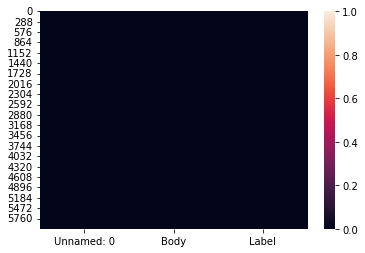

In [5]:
sns.heatmap(dataset.isnull())

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6046 entries, 0 to 6045
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6046 non-null   int64 
 1   Body        6045 non-null   object
 2   Label       6046 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 141.8+ KB


In [7]:
dataset = dataset.dropna()

In [8]:
 dataset['Label'].isnull().sum()

0

In [9]:
dataset['Body'].isnull().sum()

0

In [10]:
dataset.pop('Unnamed: 0')


0          0
1          1
2          2
3          3
4          4
        ... 
6041    6041
6042    6042
6043    6043
6044    6044
6045    6045
Name: Unnamed: 0, Length: 6045, dtype: int64

In [11]:
X = dataset['Body'].values
y = dataset['Label'].values

##Splitting the dataset


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

#Cleaning the texts


##Cleaning the train dataset


In [16]:
import re 
import nltk 
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer 
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()
corpus_train = []
for i in range(0,len(X_train)):
  review = re.sub("[^a-zA-Z]"," ",X_train[i])
  review = review.lower()
  review = review.split()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [lemmatizer.lemmatize(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus_train.append(review) 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


##Cleaning the test dataset

In [17]:

corpus_test = []
for i in range(0,len(X_test)):
  review = re.sub("[^a-zA-Z]"," ",X_test[i])
  review = review.lower()
  review = review.split()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [lemmatizer.lemmatize(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus_test.append(review)

##Creating the TF-IDF model

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=40000)
X_train_new = cv.fit_transform(corpus_train).toarray()
X_test_new = cv.transform(corpus_test).toarray()

In [19]:
features = cv.get_feature_names()

In [21]:
len(features)

40000

##Training the model

In [22]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train_new,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

##Predicting the model

In [23]:
y_pred = classifier.predict(X_test_new)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [1 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


##Making the confusion matrix

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[799  36]
 [ 76 298]]


0.9073614557485525